# Desafio - Análise de Negócios

Variação do Preço do Barril de Petróleo Brent

Objetivo: Criar um dashboard analisando a variação do preço do barril de petróleo Brent ao longo do tempo,
utilizando a tabela disponível no site Ipea Data. Além disso, você pode utilizar dados externos relevantes
para complementar a análise.



## Passo 1: Coletando os dados

Acesse o site mencionado e baixe a tabela que contém os dados históricos do preço do barril de petróleo Brent (FOB). Os dados estão na página do Ipea, salve em um csv em seu computador.

In [21]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd

In [23]:
dados = pd.read_csv('https://raw.githubusercontent.com/Tamireees/Tech_Challenge_fase04/refs/heads/main/ipeadata%5B28-10-2024-08-51%5D.csv', sep=',')

* Preço por barril do petróleo bruto tipo Brent. Produzido no Mar do Norte (Europa), Brent é uma classe de petróleo bruto que serve como benchmark para o preço internacional de diferentes tipos de petróleo. Neste caso, é valorado no chamado preço FOB (free on board), que não inclui despesa de frete e seguro no preço.

In [24]:
dados.head()

,Data,Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366,Unnamed: 2
0,20/05/1987,18.63,NaN
1,21/05/1987,18.45,NaN
2,22/05/1987,18.55,NaN
3,23/05/1987,NaN,NaN
4,24/05/1987,NaN,NaN


## Passo 2: Limpeza e preparação dos dados
Utilize ferramentas de sua preferência (com Python) para abrir o arquivo CSV e fazer a limpeza e preparação dos dados. Verifique se há dados ausentes, remova linhas ou preencha-os conforme apropriado. Certifique se de que as colunas estão corretamente formatadas e converta-as, se necessário.

In [25]:
dados.columns

Index(['Data',
       'Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366',
       'Unnamed: 2'],
      dtype='object')

In [26]:
dados.shape

(13670, 3)

In [27]:
dados.rename(columns={'Data': 'data', 'Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366': 'preco_petroleo', 'Unnamed: 2': 'excluir'}, inplace=True)

In [28]:
# Deletando a ultima coluna que nao tem nenhuma informação:
dados.drop(columns='excluir', inplace=True)

In [29]:
# Verificando se há valores duplicados:
dados.value_counts()

data        preco_petroleo
31/12/2021  77.24             1
01/01/2005  40.24             1
01/01/2006  56.91             1
01/01/2007  59.41             1
01/01/2008  95.92             1
                             ..
01/02/2000  27.35             1
01/02/2001  27.17             1
01/02/2002  19.70             1
01/02/2003  30.73             1
01/02/2004  30.77             1
Name: count, Length: 11282, dtype: int64

In [30]:
# Substituindo o valor nulo (nan) por '0,00':
dados['preco_petroleo'].fillna(value = '0.00', inplace=True)

C:\Users\tamir\AppData\Local\Temp\ipykernel_23224\2163437755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['preco_petroleo'].fillna(value = '0.00', inplace=True)
C:\Users\tamir\AppData\Local\Temp\ipykernel_23224\2163437755.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dados['preco_petroleo'].fillna(value = '0.00', inplace=True)


In [31]:
# Alterando os tipos de dados:
dados['preco_petroleo'] = dados['preco_petroleo'].astype(float)

In [32]:

dados['data'] = pd.to_datetime(dados['data'] )

C:\Users\tamir\AppData\Local\Temp\ipykernel_23224\48893709.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dados['data'] = pd.to_datetime(dados['data'] )


In [33]:
dados['ano'] = dados['data'].dt.year
dados['mes'] = dados['data'].dt.month

In [34]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13670 entries, 0 to 13669
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            13670 non-null  datetime64[ns]
 1   preco_petroleo  13670 non-null  float64       
 2   ano             13670 non-null  int32         
 3   mes             13670 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 320.5 KB



## Passo 3: Análise exploratória

Explore os dados para obter insights preliminares sobre a variação do preço do barril de petróleo Brent. Calcule estatísticas descritivas básicas, como média, mediana, mínimo, máximo e desvio padrão do preço. Plote um gráficos para entender bem o dataset.

In [35]:
dados.head()

,data,preco_petroleo,ano,mes
0,1987-05-20,18.63,1987,5
1,1987-05-21,18.45,1987,5
2,1987-05-22,18.55,1987,5
3,1987-05-23,0.00,1987,5
4,1987-05-24,0.00,1987,5


In [36]:
dados.describe().T

,count,mean,min,25%,50%,75%,max,std
data,13670,2006-02-03 12:00:00,1987-05-20 00:00:00,1996-09-26 06:00:00,2006-02-03 12:00:00,2015-06-13 18:00:00,2024-10-21 00:00:00,NaN
preco_petroleo,13670.0,43.983937,0.0,16.55,32.52,71.2075,143.95,36.300833
ano,13670.0,2005.592392,1987.0,1996.0,2006.0,2015.0,2024.0,10.809644
mes,13670.0,6.535406,1.0,4.0,7.0,10.0,12.0,3.435115


In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Verificando se os meses unicos para cada ano, e caso algum tenha o valor diferenciado, iremos excluir da analise.
contagem_meses_por_ano = dados.groupby('ano').agg(meses_unicos=('mes', 'nunique'),
                                                  soma_preco_petroleo=('preco_petroleo', 'sum')).reset_index()

contagem_meses_por_ano.head()

,ano,meses_unicos,soma_preco_petroleo
0,1987,8,2964.13
1,1988,12,3800.88
2,1989,12,4629.97
3,1990,12,6082.93
4,1991,12,5150.57


In [42]:
# Excluindo a primeira linha do ano 1987, pois tem dados faltantes e a ultima, 2024 que ainda faltam dados.T

# Excluir as linhas desejadas
contagem_meses_por_ano = contagem_meses_por_ano.drop([0, 36])
print(contagem_meses_por_ano)


     ano  meses_unicos  soma_preco_petroleo
1   1989            12              4629.97
2   1990            12              6082.93
3   1991            12              5150.57
4   1992            12              4965.17
5   1993            12              4287.38
6   1994            12              3995.81
7   1995            12              4305.01
8   1996            12              5242.51
9   1997            12              4738.91
10  1998            12              3227.80
11  1999            12              4457.49
12  2000            12              7251.15
13  2001            12              6285.12
14  2002            12              8431.54
15  2003            12             10444.97
16  2004            12             13929.13
17  2005            12             19774.62
18  2006            12             23702.57
19  2007            12             25858.87
20  2008            12             35404.04
21  2009            12             22257.05
22  2010            12          

C:\Users\tamir\AppData\Local\Temp\ipykernel_23224\3822457277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ano', y='soma_preco_petroleo', data=contagem_meses_por_ano, palette="cividis")


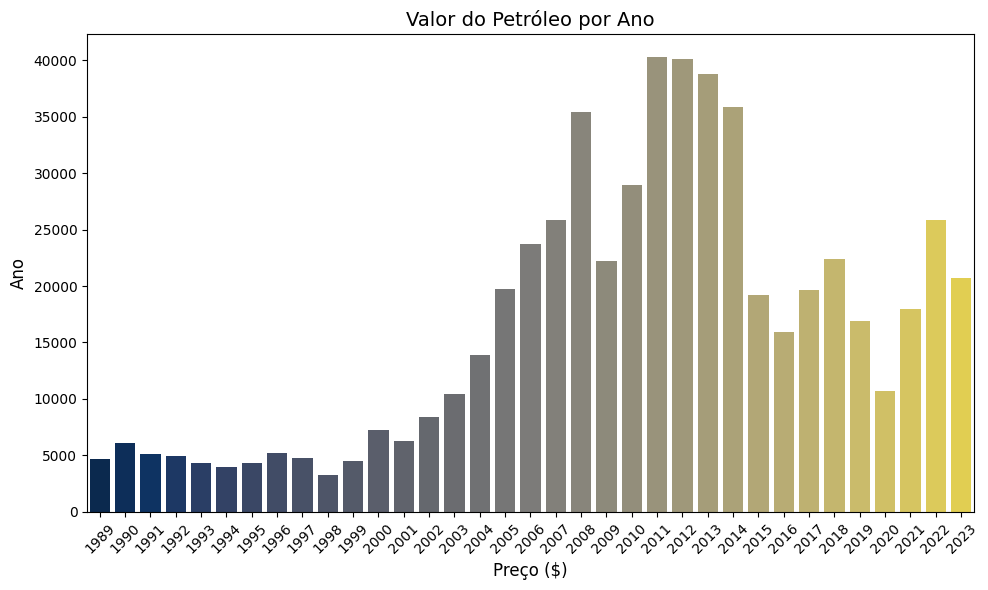

In [180]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='ano', y='soma_preco_petroleo', data=contagem_meses_por_ano, palette="cividis")

# Adiciona título e rótulos dos eixos
plt.title('Valor do Petróleo por Ano', fontsize=14)
plt.xlabel('Preço ($)', fontsize=12)
plt.ylabel('Ano', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45
           )  # Define rotação de 0 graus

plt.tight_layout()  # Ajusta o layout
plt.show()

* **Entre 1988 e 2000, o preço anual manteve-se em até 10.000.**
* **Ano de 2000 ate 2023, ocorreu muitos altos e baixo.**

* **Houve um aumento drástico em 2008.**
* **O preço caiu em 2009.**
* **Nos anos de 2011, 2012, 2013 e 2014, ocorreu um aumento significativo no preço.**

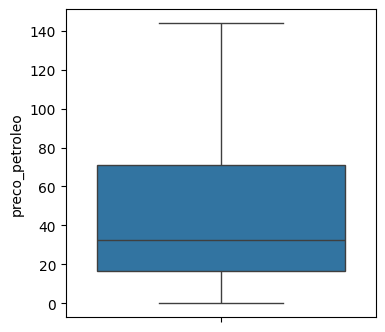

In [25]:
ax = sns.boxplot(y=dados['preco_petroleo'], data=dados)
ax.figure.set_size_inches(4,4)

**Considerando os dados apresentados, a análise de um período tão extenso pode dificultar a identificação de tendências claras, especialmente porque as variações mais relevantes ocorreram após os anos 2000. Assim, faz mais sentido focar nesse intervalo mais recente, excluindo os dados anteriores a 2000 do nosso dataframe. Essa abordagem permitirá uma investigação mais precisa das oscilações de preço e facilitará a identificação de padrões significativos.**


In [43]:
contagem_meses_por_ano.head()

,ano,meses_unicos,soma_preco_petroleo
1,1989,12,4629.97
2,1990,12,6082.93
3,1991,12,5150.57
4,1992,12,4965.17
5,1993,12,4287.38


In [51]:
dados_limpos = contagem_meses_por_ano[contagem_meses_por_ano['ano']>=2000].reset_index(drop=True)
dados_limpos.head()

,ano,meses_unicos,soma_preco_petroleo
0,2000,12,7251.15
1,2001,12,6285.12
2,2002,12,8431.54
3,2003,12,10444.97
4,2004,12,13929.13


C:\Users\tamir\AppData\Local\Temp\ipykernel_23224\2515913722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ano', y='soma_preco_petroleo', data=dados_limpos, palette='cividis')


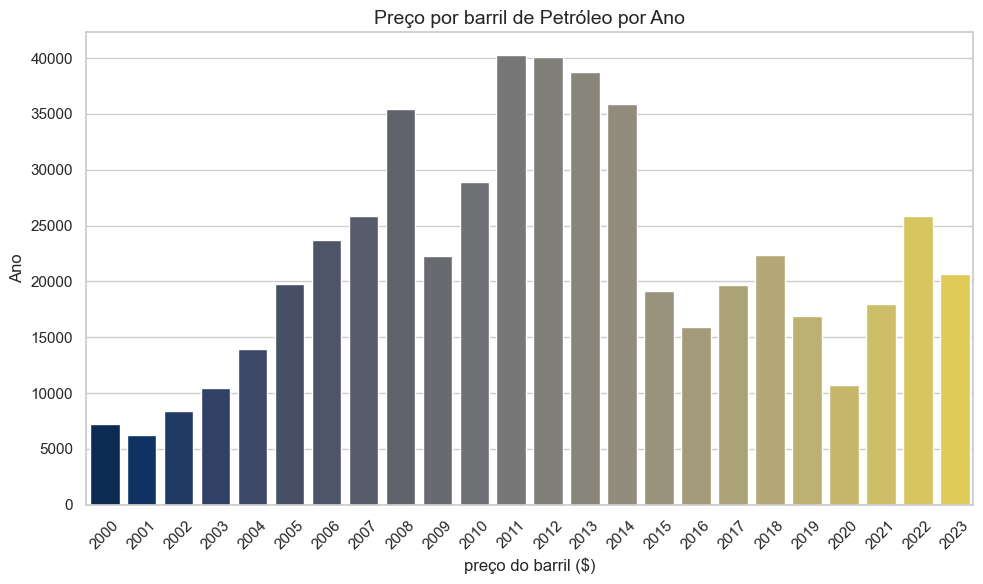

In [249]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='ano', y='soma_preco_petroleo', data=dados_limpos, palette='cividis')

# Adiciona título e rótulos dos eixos
plt.title('Preço por barril de Petróleo por Ano', fontsize=14)
plt.xlabel('preço do barril ($)', fontsize=12)
plt.ylabel('Ano', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45
           )  # Define rotação de 0 graus

plt.tight_layout()  # Ajusta o layout
plt.show()

Dessa forma, podemos realizar uma análise mais direta e focada nos valores, o que nos permitirá fazer previsões mais precisas e realistas com base nos dados disponíveis. No entanto, é fundamental prestar atenção em eventos específicos que impactaram significativamente os preços, como os anos de 2008, 2011, 2012 e 2013. Durante esses anos, observamos um crescimento acentuado que se destaca em comparação com outros períodos, o que sugere a presença de fatores externos ou mudanças no mercado que precisam ser compreendidos.

Além disso, o ano de 2020 também merece uma análise detalhada, pois registrou uma queda significativa nos preços. Essa redução pode estar relacionada a eventos globais, como a pandemia de COVID-19, que afetou economias e mercados de diversas maneiras.

Ao investigar esses anos críticos, não apenas ganhamos uma visão mais clara das tendências de preços, mas também podemos identificar padrões e causas subjacentes que poderão ser essenciais para nossas previsões futuras. A compreensão desses contextos históricos nos permitirá desenvolver modelos preditivos mais robustos e informados.


## Passo 4: Complementando a análise com dados externos

Para enriquecer sua análise, busque dados externos relevantes que possam influenciar o preço do petróleo Brent. Por exemplo, você pode procurar dados sobre produção global de petróleo, eventos geopolíticos, crises econômicas, demanda global por energia, entre outros. Integre esses dados à sua análise e avalie como eles se relacionam com a variação do preço do barril de petróleo Brent ao longo do tempo.



In [131]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
producao = pd.read_excel("C:\\Users\\tamir\\OneDrive\\Área de Trabalho\\producao.xlsx")

In [157]:
producao.head()

,year,barrels per year,country
0,2000,5.7,Albania
1,2001,5.6,Albania
2,2002,7.1,Albania
3,2003,6.8,Albania
4,2004,7.6,Albania


In [158]:
producao.shape


(2571, 3)

In [159]:
producao.columns

Index(['year', 'barrels per year', 'country'], dtype='object')

In [160]:
print(producao['barrels per year'].unique())

['5.7' '5.6' '7.1' ... 300 286 281]


In [161]:
import numpy as np

# Substituir '--' por NaN
producao['barrels per year'] = producao['barrels per year'].replace('--', 0)

In [162]:
producao['year'] = pd.to_datetime(producao['year'], format='%Y').dt.year
producao['barrels per year'] = producao['barrels per year'].astype(float)

In [163]:
producao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2571 non-null   int32  
 1   barrels per year  2571 non-null   float64
 2   country           2571 non-null   object 
dtypes: float64(1), int32(1), object(1)
memory usage: 50.3+ KB


In [164]:
producao['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int32)

In [165]:
producao['country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'East Timor',
       'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Finland',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Libya', 'Lithuania',
       'Malaysia', 'Mongolia', 'Myanmar', 'Netherlands', 'New Zealand',
       'Niger', 'Nigeria', 'North Korea', 'Norway', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Paragua

In [166]:
# Verificando se há valores duplicados:
producao.value_counts()

# Temos valores repetidos, porem ja era esperado.

year  barrels per year  country       
2023  21973.0           United States     1
2000  0.2               Mongolia          1
      0.4               Tajikistan        1
      0.5               Bulgaria          1
      0.9               Philippines       1
                                         ..
      7.0               Ivory Coast       1
      7.5               Czech Republic    1
      9.0               Chile             1
      10.0              Suriname          1
      12.0              Myanmar           1
Name: count, Length: 2571, dtype: int64

In [167]:
producao_soma_por_ano = producao.groupby('year')['barrels per year'].sum().reset_index()
producao_soma_por_ano.head()

,year,barrels per year
0,2000,72047.9
1,2001,72079.1
2,2002,71891.4
3,2003,74586.9
4,2004,79177.1


C:\Users\tamir\AppData\Local\Temp\ipykernel_23224\4054531641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='barrels per year', data=producao_soma_por_ano, palette="colorblind")


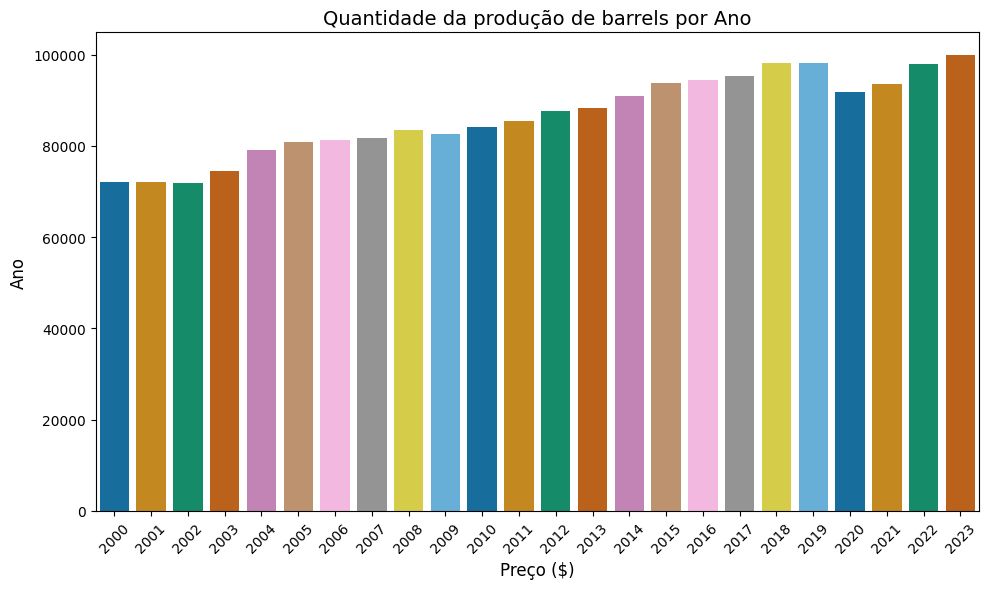

In [183]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='year', y='barrels per year', data=producao_soma_por_ano, palette="colorblind")

# Adiciona título e rótulos dos eixos
plt.title('Quantidade da produção de barrels por Ano', fontsize=14)
plt.xlabel('Preço ($)', fontsize=12)
plt.ylabel('Ano', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45
           )  # Define rotação de 0 graus

plt.tight_layout()  # Ajusta o layout
plt.show()

In [186]:
producao_soma_por_ano['percent_growth'] = producao_soma_por_ano['barrels per year'].pct_change() * 100

In [248]:
producao_soma_por_ano.head(25)

,year,barrels per year,percent_growth
0,2000,72047.9,NaN
1,2001,72079.1,0.043305
2,2002,71891.4,-0.260408
3,2003,74586.9,3.749405
4,2004,79177.1,6.154164
5,2005,80755.4,1.993379
6,2006,81374.2,0.766265
7,2007,81825.1,0.554107
8,2008,83441.3,1.975189
9,2009,82562.0,-1.053795


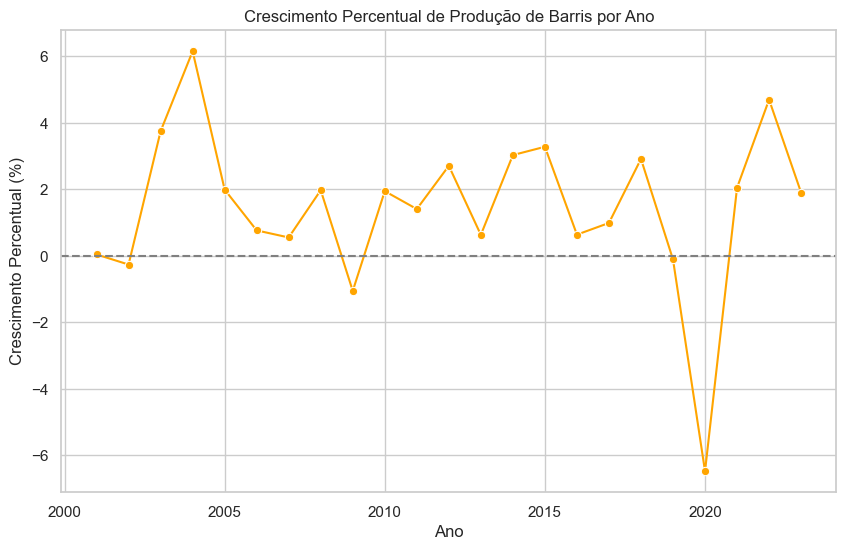

In [196]:
sns.set(style="whitegrid")

# Cria um gráfico de linha para a porcentagem de crescimento
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='percent_growth', data=producao_soma_por_ano, marker='o', color='orange')

# Configura os rótulos e título
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual (%)')
plt.title('Crescimento Percentual de Produção de Barris por Ano')

# Exibe o gráfico
plt.axhline(0, color='gray', linestyle='--')  # Linha horizontal no 0 para referência
plt.show()


O gráfico da produção anual de barris de petróleo ao longo dos anos de 2000 a 2023, acompanhada da taxa de crescimento percentual anual. A análise dos dados oferece insights importantes sobre as flutuações no setor de petróleo, bem como sobre o impacto de eventos globais específicos na produção.

Estabilidade Inicial (2000–2002): Entre 2000 e 2002, a produção de petróleo manteve-se estável, com oscilações muito pequenas, como o crescimento marginal de 0,04% em 2001 e uma leve queda de 0,26% em 2002.

Período de Crescimento Moderado (2003–2008): De 2003 a 2008, a produção apresentou um crescimento constante, especialmente notável em 2004 (6,15%), refletindo um aumento na demanda global impulsionado pelo crescimento econômico em várias regiões, especialmente na Ásia.

Crise Econômica Global (2009): Em 2009, observa-se uma queda de -1,05% na produção, refletindo o impacto da crise econômica global de 2008-2009, que reduziu a demanda e afetou a produção e os preços do petróleo.

Recuperação e Crescimento (2010–2019): Após a crise, a produção volta a crescer, apresentando valores consistentes de aumento na maioria dos anos, com destaques como 2015 (3,28%) e 2018 (2,92%). Esse período reflete o fortalecimento da economia global e a recuperação da demanda por petróleo.

Impacto da Pandemia (2020): Em 2020, há uma queda expressiva de -6,48% na produção, a maior de toda a série, devido à pandemia de COVID-19, que levou a uma redução drástica na demanda por petróleo e no consumo global de energia.

Recuperação Pós-Pandemia (2021–2023): A partir de 2021, a produção retoma um crescimento moderado. Em 2022, destaca-se uma recuperação significativa de 4,69%, com a demanda global voltando aos níveis pré-pandêmicos. Em 2023, o crescimento continua, embora em um ritmo mais moderado (1,9%).

In [168]:
producao_soma_por_pais = producao.groupby('country')['barrels per year'].sum().reset_index()
producao_soma_por_pais.head(20)

,country,barrels per year
0,Albania,308.3
1,Algeria,40983.0
2,Angola,34806.0
3,Argentina,18661.0
4,Armenia,0.0
5,Aruba,19.6
6,Australia,12444.0
7,Austria,647.0
8,Azerbaijan,16828.0
9,Bahrain,4819.0


In [169]:
valores_zerados = (producao_soma_por_pais['barrels per year'] == 0).sum()
print(f"Número de valores zerados: {valores_zerados}")


Número de valores zerados: 2


In [171]:
producao_soma_por_pais = producao_soma_por_pais[producao_soma_por_pais['barrels per year'] != 0]

In [239]:
top_10_paises = producao_soma_por_pais.nlargest(10, 'barrels per year')
top_10_paises.head(10)

,country,barrels per year
108,United States,307914.0
85,Saudi Arabia,259531.0
84,Russia,241077.0
25,China,105279.0
22,Canada,97562.0
50,Iran,94040.0
106,United Arab Emirates,79722.0
51,Iraq,75532.0
18,Brazil,63811.0
59,Kuwait,63108.0


C:\Users\tamir\AppData\Local\Temp\ipykernel_23224\1229225261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='country', y='barrels per year', data=top_10_paises, palette="colorblind")


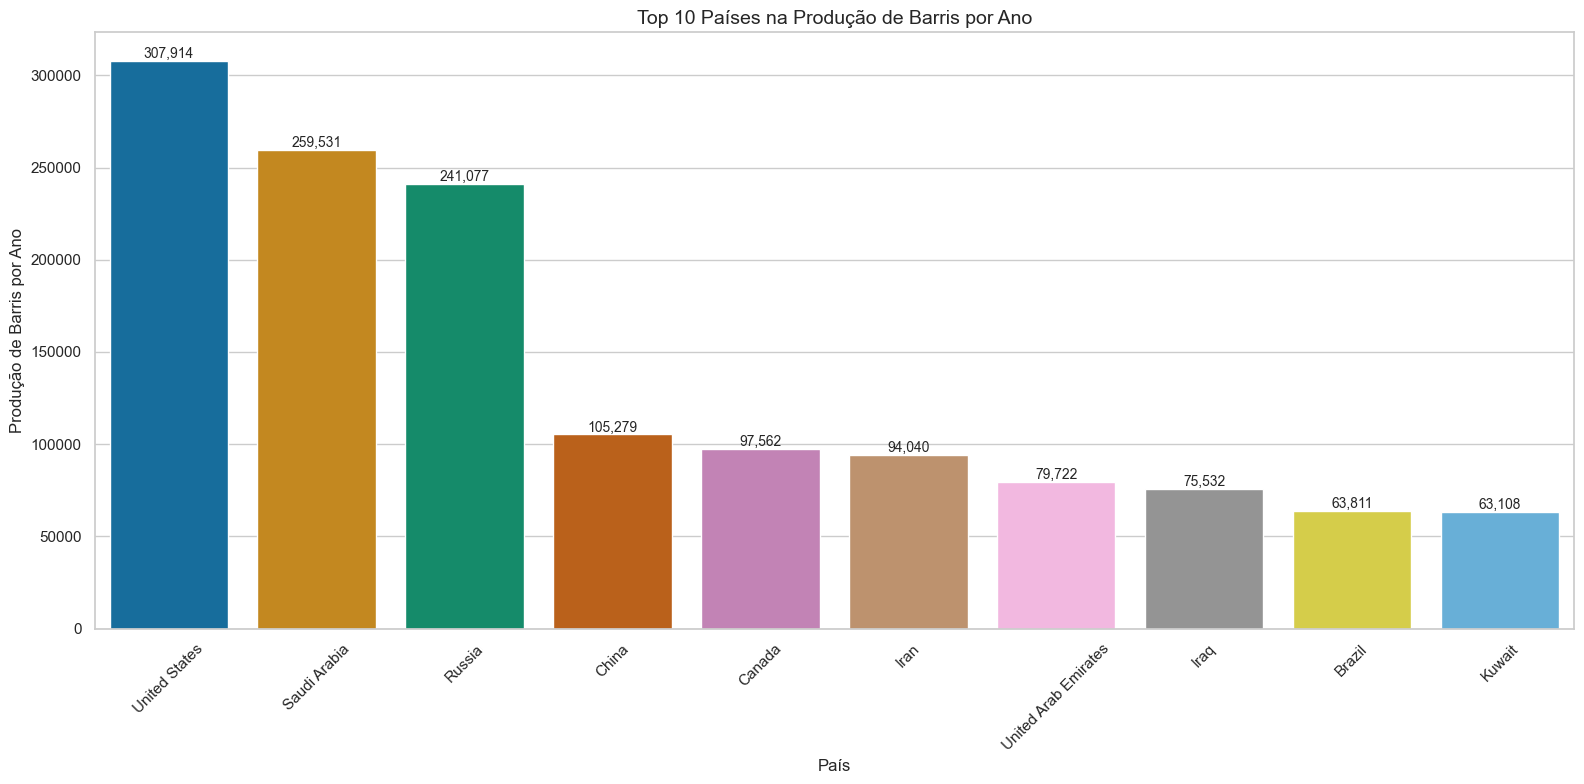

In [203]:
plt.figure(figsize=(16, 8))  # Ajusta o tamanho da figura
ax = sns.barplot(x='country', y='barrels per year', data=top_10_paises, palette="colorblind")

# Adiciona título e rótulos dos eixos
plt.title('Top 10 Países na Produção de Barris por Ano', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Produção de Barris por Ano', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45)

# Adiciona anotações dos valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formata o valor com vírgulas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição da anotação
                ha='center', va='bottom', fontsize=10)  # Alinhamento e tamanho da fonte

plt.tight_layout()  # Ajusta o layout
plt.show()


Os dados apresentados mostram a produção de petróleo em barris por ano para os principais países produtores, destacando o domínio de algumas nações no setor.

Estados Unidos lidera a produção global com 307.914 milhões de barris anuais, refletindo sua posição consolidada como principal produtor mundial. A capacidade de extração dos EUA se apoia em avanços tecnológicos, como o fraturamento hidráulico (fracking), que aumentou significativamente a produção nas últimas décadas.

Arábia Saudita ocupa o segundo lugar, com 259.531 milhões de barris, impulsionada por suas vastas reservas no Oriente Médio e pelo papel central que desempenha na Organização dos Países Exportadores de Petróleo (OPEP).

Rússia, em terceiro, com 241.077 milhões de barris, também desempenha um papel fundamental no mercado global de petróleo, fornecendo uma quantidade significativa para a Europa e a Ásia.

China e Canadá produzem 105.279 milhões e 97.562 milhões de barris, respectivamente. A China, embora seja um grande consumidor de petróleo, possui também uma produção significativa. O Canadá, por sua vez, conta com reservas consideráveis de petróleo, especialmente nas areias betuminosas de Alberta.

Outros países notáveis incluem o Irã (94.040 milhões), que enfrenta desafios devido a sanções econômicas, e os Emirados Árabes Unidos (79.722 milhões), que são conhecidos por suas reservas abundantes e política energética de expansão.

Iraque (75.532 milhões), Brasil (63.811 milhões), e Kuwait (63.108 milhões) completam a lista, cada um com um papel relevante na produção global. O Brasil, o único país da América Latina na lista, destaca-se pela exploração de petróleo em águas profundas, como na região do pré-sal.

Esses dados sublinham a importância estratégica do petróleo para cada uma dessas economias e evidenciam as diferenças na capacidade de produção entre os países, influenciando o mercado energético global.

In [222]:
# Filtra os dados para incluir apenas Ucrânia e Rússia
df_filtrado = producao[producao['country'].isin(['Ukraine'])]

# Agrupa os dados pelo país e ano, somando a produção de barris por ano
df_1 = df_filtrado.groupby(['country', 'year'])['barrels per year'].sum().reset_index()

# Exibe o DataFrame resultante
print(df_1)


    country  year  barrels per year
0   Ukraine  2000              82.0
1   Ukraine  2001              82.0
2   Ukraine  2002              83.0
3   Ukraine  2003              87.0
4   Ukraine  2004              95.0
5   Ukraine  2005              98.0
6   Ukraine  2006             106.0
7   Ukraine  2007             106.0
8   Ukraine  2008              99.0
9   Ukraine  2009              93.0
10  Ukraine  2010              82.0
11  Ukraine  2011              78.0
12  Ukraine  2012              80.0
13  Ukraine  2013              74.0
14  Ukraine  2014              65.0
15  Ukraine  2015              60.0
16  Ukraine  2016              57.0
17  Ukraine  2017              56.0
18  Ukraine  2018              58.0
19  Ukraine  2019              62.0
20  Ukraine  2020              61.0
21  Ukraine  2021              62.0
22  Ukraine  2022              18.0
23  Ukraine  2023               7.2


C:\Users\tamir\AppData\Local\Temp\ipykernel_23224\3844320692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='barrels per year', data=df_1, palette="cividis")


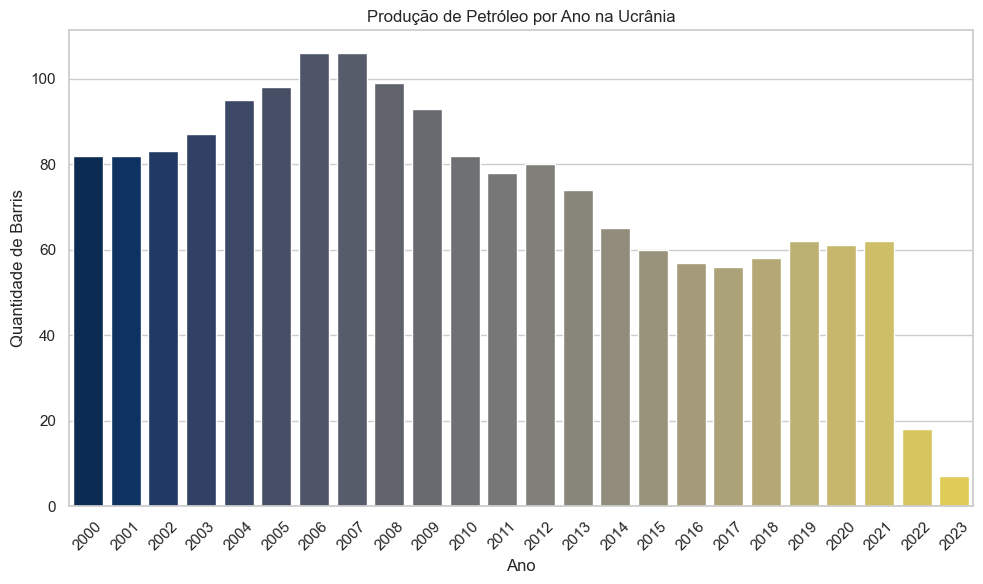

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='barrels per year', data=df_1, palette="cividis")

# Configura os rótulos e título
plt.xlabel('Ano')
plt.ylabel('Quantidade de Barris')
plt.title('Produção de Petróleo por Ano na Ucrânia')

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45)

# Adiciona anotações dos valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formata o valor com vírgulas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição da anotação
                ha='center', va='bottom', fontsize=10)  # Alinhamento e tamanho da fonte

plt.tight_layout()  # Ajusta o layout
plt.show()


Os conflitos entre a Ucrânia e a Rússia têm raízes históricas profundas, mas os eventos mais recentes que escalaram para um conflito armado começaram em 2014. Aqui estão os principais marcos:

* 2014: A crise começou em fevereiro de 2014, quando a Rússia anexou a Crimeia, uma península da Ucrânia. Isso ocorreu após a deposição do presidente ucraniano Viktor Yanukovych, que era pró-Rússia.

* Conflito no Leste da Ucrânia: Após a anexação da Crimeia, começaram os combates no leste da Ucrânia, onde grupos separatistas prorrussos declararam independência nas regiões de Donetsk e Luhansk. Este conflito resultou em uma guerra que continua até hoje.

* Escalada em 2021-2022: Em 2021, tensões aumentaram novamente com uma concentração significativa de tropas russas na fronteira com a Ucrânia. Em fevereiro de 2022, a Rússia lançou uma invasão em grande escala da Ucrânia, intensificando o conflito de forma dramática.


Ao analisar o gráfico, é evidente uma drástica queda na produção de petróleo na Ucrânia em 2022. Essa diminuição acentuada pode ser atribuída diretamente à guerra em curso, que começou em fevereiro daquele ano com a invasão russa.

A guerra impactou significativamente a infraestrutura do país, resultando em interrupções na produção e nas operações econômicas. As instalações de extração de petróleo, que são vitais para a economia ucraniana, enfrentaram desafios devido aos combates e à instabilidade na região. Além disso, a instabilidade política e as sanções internacionais contribuíram para a retração da produção.

Em resumo, a análise dos dados não apenas reflete a realidade econômica da Ucrânia durante um período de conflito, mas também destaca como situações geopolíticas podem ter consequências diretas na produção de recursos naturais e, por extensão, na economia de um país. Essa queda na produção é um indicador importante das dificuldades enfrentadas pela Ucrânia em tempos de guerra e ressalta a importância de monitorar eventos geopolíticos ao analisar dados econômicos.

In [235]:
# Filtra os dados para incluir apenas Ucrânia e Rússia
df_filtrado_1 = producao[producao['country'].isin(['Russia'])]

# Agrupa os dados pelo país e ano, somando a produção de barris por ano
df_2 = df_filtrado_1.groupby(['country', 'year'])['barrels per year'].sum().reset_index()

# Exibe o DataFrame resultante
print(df_2)

   country  year  barrels per year
0   Russia  2000            6527.0
1   Russia  2001            7061.0
2   Russia  2002            7741.0
3   Russia  2003            8581.0
4   Russia  2004            9387.0
5   Russia  2005            9647.0
6   Russia  2006            9734.0
7   Russia  2007           10038.0
8   Russia  2008            9874.0
9   Russia  2009           10047.0
10  Russia  2010           10288.0
11  Russia  2011           10409.0
12  Russia  2012           10596.0
13  Russia  2013           10766.0
14  Russia  2014           10853.0
15  Russia  2015           11035.0
16  Russia  2016           11245.0
17  Russia  2017           11231.0
18  Russia  2018           11385.0
19  Russia  2019           11474.0
20  Russia  2020           10496.0
21  Russia  2021           10777.0
22  Russia  2022           10978.0
23  Russia  2023           10907.0


C:\Users\tamir\AppData\Local\Temp\ipykernel_23224\720372221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='barrels per year', data=df_2, palette="cividis")


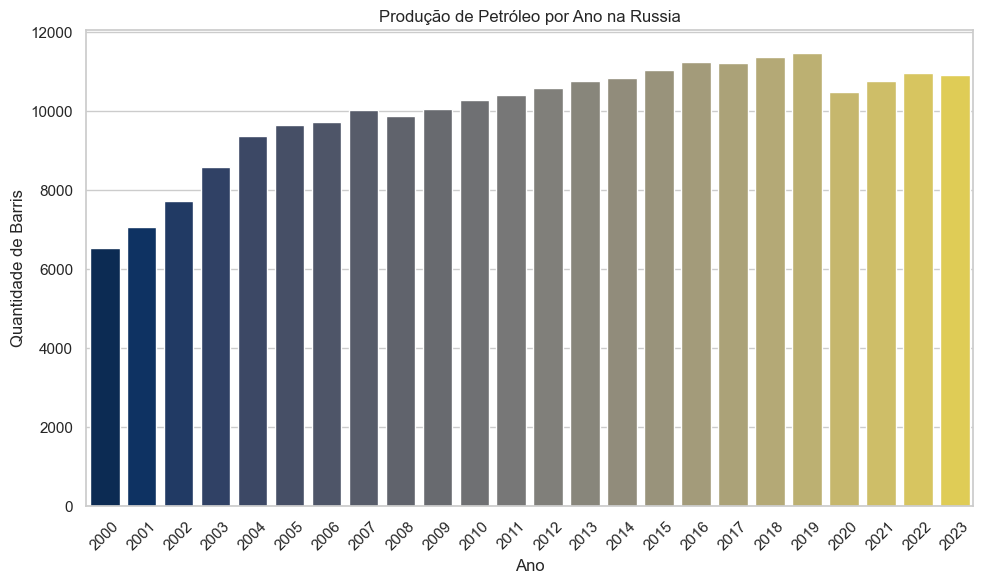

In [236]:

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='barrels per year', data=df_2, palette="cividis")


# Configura os rótulos e título
plt.xlabel('Ano')
plt.ylabel('Quantidade de Barris')
plt.title('Produção de Petróleo por Ano na Russia')

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45)

# Adiciona anotações dos valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formata o valor com vírgulas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição da anotação
                ha='center', va='bottom', fontsize=10)  # Alinhamento e tamanho da fonte

plt.tight_layout()  # Ajusta o layout
plt.show()

Ao analisar os dados da produção de petróleo da Rússia, é notável que, mesmo em meio a um contexto geopolítico desafiador, como as sanções internacionais e o impacto da guerra na Ucrânia, a produção de barris por ano parece ter se mantido relativamente estável.

Entre 2000 e 2023, a produção de petróleo na Rússia exibiu uma tendência geral de crescimento, com algumas oscilações. Em 2022, ano em que a guerra na Ucrânia intensificou-se, a produção foi de 10.978 milhões de barris, um leve aumento em relação a 2021, que registrou 10.777 milhões de barris. Mesmo em 2023, a produção permaneceu em um patamar semelhante, com 10.907 milhões de barris.

Esses dados sugerem que a Rússia conseguiu, até certo ponto, mitigar os efeitos adversos que a guerra e as sanções poderiam ter sobre sua produção. É importante ressaltar que a Rússia é um dos maiores produtores de petróleo do mundo e, portanto, sua infraestrutura e capacidade de extração são robustas. No entanto, o cenário global continua incerto, e a produção futura pode ser influenciada por fatores externos, como novas sanções ou alterações na demanda mundial.

Assim, ao interpretar esses números, é crucial considerar não apenas a produção em si, mas também o contexto mais amplo que envolve decisões políticas, sanções econômicas e a dinâmica do mercado global de energia.

## Passo 5: Criação do dashboard

Com os dados preparados e analisados, é hora de criar um dashboard interativo para apresentar suas desco-
bertas. Utilize uma ferramenta de visualização de dados, como Tableau, Power BI ou Python (por exemplo,
usando bibliotecas como Matplotlib, Seaborn ou Plotly), para criar gráficos e visualizações interativas. Certifi-
que-se de incluir informações relevantes sobre a variação do preço do barril de petróleo Brent, bem como in-
sights derivados da análise dos dados.

Lembre-se de documentar todo o processo, desde a coleta dos dados até a criação do dashboard. Isso aju-
dará a refletir sobre as etapas realizadas e a compartilhar seu conhecimento com outras pessoas interessa-
das na analise de dados.